How I plan to start this off. (Jean)

In [25]:
# !pip install tensorflow 

In [26]:
# pip install tensorflow-gpu

In [27]:
# Just took whatever libraries he put on from class notes so I don't go back and forth. Will change later (maybe?)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [28]:
#Load Data
train_df = pd.read_csv("train.csv.zip")
train_df = train_df.head(1000)


In [29]:
# Use the Count Vectorizer to grab the info and Features I would need. 
vec_cv = CountVectorizer(max_features=150)
tmp = vec_cv.fit_transform(train_df["comment_text"])
tok_cols = vec_cv.get_feature_names_out()
tok_df = pd.DataFrame(tmp.toarray(), columns=tok_cols)
print("original:", train_df["comment_text"].shape)
print("vectorized:", tmp.shape)
tok_df.sample(10)

original: (1000,)
vectorized: (1000, 150)


,about,after,again,all,also,am,an,and,any,are,...,which,who,why,wikipedia,will,with,would,wp,you,your
585,0,0,0,0,0,0,0,2,0,1,...,0,0,0,0,0,0,0,0,1,0
203,1,0,0,0,0,1,0,2,0,1,...,0,0,1,0,0,1,0,1,3,0
573,1,0,0,1,1,0,0,1,0,2,...,0,0,0,0,0,0,0,0,2,0
394,0,0,0,0,0,0,0,3,1,0,...,1,0,0,0,0,1,0,0,0,0
444,0,2,1,1,0,0,0,3,0,0,...,0,0,0,0,2,0,0,0,0,0
477,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
958,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,2,0,0,7,2
884,0,0,0,0,0,0,0,3,0,2,...,0,0,0,0,0,0,0,0,2,0
678,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
607,1,1,0,0,0,0,0,1,0,0,...,1,0,1,1,0,0,1,0,1,0


In [30]:
#TF-IDF
vec_tf = TfidfVectorizer(max_features=150, strip_accents="unicode")
tmp = vec_tf.fit_transform(train_df["comment_text"])
tok_cols = vec_tf.get_feature_names_out()
tok_df = pd.DataFrame(tmp.toarray(), columns=tok_cols)
print("original:", train_df["comment_text"].shape)
print("vectorized:", tmp.shape)
tok_df.sample(10)

original: (1000,)
vectorized: (1000, 150)


,about,after,again,all,also,am,an,and,any,are,...,which,who,why,wikipedia,will,with,would,wp,you,your
146,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000
110,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000
414,0.000000,0.0,0.0,0.213828,0.000000,0.000000,0.000000,0.122244,0.0,0.166762,...,0.0,0.000000,0.0,0.197874,0.000000,0.171152,0.000000,0.0,0.256488,0.00000
55,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.190193,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000
693,0.000000,0.0,0.0,0.000000,0.243484,0.000000,0.104860,0.129561,0.0,0.088372,...,0.0,0.000000,0.0,0.000000,0.112248,0.000000,0.114133,0.0,0.271842,0.00000
194,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.773396,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000
893,0.054425,0.0,0.0,0.116651,0.000000,0.000000,0.053974,0.233409,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.034981,0.05166
701,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.559407,0.0,0.000000,0.000000,0.201923,0.000000,0.0,0.000000,0.00000
972,0.000000,0.0,0.0,0.000000,0.000000,0.269519,0.000000,0.267809,0.0,0.182669,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.421431,0.00000
226,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000


I'm comparing count vectorization and TF-IDF. Most likely going to use some sort of vectorization parameters. Most likely would be making a tokenizaer to figure out whether it is a threat or not.

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       243
           1       0.00      0.00      0.00         7

    accuracy                           0.97       250
   macro avg       0.49      0.50      0.49       250
weighted avg       0.94      0.97      0.96       250



c:\Users\Stan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Stan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Stan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

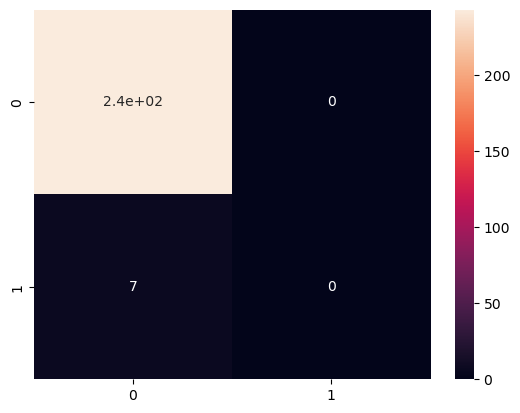

In [31]:
from sklearn.svm import SVC
model_svc = SVC()

vec_cv = CountVectorizer(max_features=150, ngram_range=[1,2])

y = train_df["obscene"]
X = train_df["comment_text"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

pipe1 = Pipeline([ 
                    ("vect", vec_cv),
                    ("model", model_svc)
])

params = ["vec_cv"]

pipe1.fit(X_train, y_train.ravel())
preds = pipe1.predict(X_test)

print(classification_report(y_test, preds))
sns.heatmap(confusion_matrix(y_test, preds), annot=True)

In [32]:
test_df = pd.read_csv('test.csv')
test_df.head(5)

,id,comment_text
0,1,Yo bitch Ja Rule is more succesful then you'll...
1,2,== From RfC == \n\n The title is fine as it is...
2,3,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,4,":If you have a look back at the source, the in..."
4,5,I don't anonymously edit articles at all.


In [33]:
pred_df = train_df.copy()
pred_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
995,02b8e9f1f138d728,""" Hi, Writingrights, Welcome to Wikipedia! \n...",0,0,0,0,0,0
996,02b90e56ec25a4c1,It is common knowledge that Karaims (but not K...,0,0,0,0,0,0
997,02b91acc085c26f8,", 12 April 2006 (UTC)\nThen rewrite and expand...",0,0,0,0,0,0
998,02b94ce316048bc1,"""I was trying to inject some humour (as eviden...",0,0,0,0,0,0


In [34]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [35]:
vectorizer = TextVectorization(max_tokens=150,
                               output_sequence_length=1800,
                               output_mode='int')

Can't seem to get the prediction working on the test text_column

In [36]:
# text_column = test_df["comment_text"]
text_column = vectorizer('You freaking suck! I am going to hit you.')
# Make predictions on the text data
predictions = pipe1.predict(np.array[text_column])
print(predictions)

# test_df["predicted_labels"] = predictions


FailedPreconditionError: Exception encountered when calling TextVectorization.call().

[1m{{function_node __wrapped__LookupTableFindV2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Table not initialized. [Op:LookupTableFindV2] name: [0m

Arguments received by TextVectorization.call():
  • inputs='You freaking suck! I am going to hit you.'

In [ ]:
test_df

,id,comment_text,predicted_labels
0,1,Yo bitch Ja Rule is more succesful then you'll...,0
1,2,== From RfC == \n\n The title is fine as it is...,0
2,3,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",0
3,4,":If you have a look back at the source, the in...",0
4,5,I don't anonymously edit articles at all.,0
...,...,...,...
153159,153160,". \n i totally agree, this stuff is nothing bu...",0
153160,153161,== Throw from out field to home plate. == \n\n...,0
153161,153162,""" \n\n == Okinotorishima categories == \n\n I ...",0
153162,153163,""" \n\n == """"One of the founding nations of the...",0


count    153164.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: predicted_labels, dtype: float64

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler


In [ ]:
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2):
		n = i*10
		steps = [('svd', TruncatedSVD(n_components=n)), ('m', LinearSVC(max_iter=100, tol=.01))]
		models[str(n)] = Pipeline(steps=steps)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	#Splits cut for speed
	cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, tok_df[0:1000], y[0:1000])
	results.append(scores)
	names.append(name)
# plot model performance for comparison

plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45)
plt.show()

ValueError: n_components == 0, must be >= 1.

In [ ]:
tf_idf = TfidfVectorizer(sublinear_tf=True, ngram_range=(1,3), stop_words="english", strip_accents="unicode")
tmp_vec = tf_idf.fit_transform(train_df["comment_text"])

tok_cols2 = tf_idf.get_feature_names()
tmp_df = pd.DataFrame(tmp_vec.toarray(), columns=tok_cols2)


In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(tmp_df, y)

In [ ]:
svd_tmp = TruncatedSVD(n_components=10)
pipe_steps = [("scale", StandardScaler()), ("svd", svd_tmp), ("model", SVC())]
pipe_test = Pipeline(steps=pipe_steps)

pipe_test.fit(X_tr, y_tr)
pipe_test.score(X_te, y_te)

In [ ]:
for index, component in enumerate(svd_tmp.components_):
    zipped = zip(tok_cols2, component)
    top_terms_key = sorted(zipped, key = lambda t: t[1], reverse=True)[:6]
    top_terms_list = list(dict(top_terms_key).keys())
    print("Topic:"+str(index)+" ", top_terms_list)